In [1]:
%matplotlib notebook
#%config InlineBackend.close_figures=False 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import *

# Discrete Fourier Transform 
### A discrete Fourier transform is a way of representing a perodic function, $f(t)$, as a summation of trigonometric functions, i.e.,

## &emsp; $f(t) = \sum_{n=-\infty}^\infty a_n \cos\left( \frac{2 n\pi t }{T } \right) + b_n \sin\left( \frac{2 n\pi t }{T } \right)$  &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp; $(1)$

### where

### &emsp; $T$ is the total time;
### &emsp; $n$ is some integer; and
### &emsp; $a_n$ and $b_n$ are compex numbers

#### Note 1:  $b_0$ is set zero since it drops out the summation in (1) , i.e., $\left.\sin\left( \frac{2 n \pi x }{T } \right)  \right|_{n=0} = \sin(0) = 0$ 
#### Note 2: If f(x) is real, then
##### &emsp; &emsp; $a_n = \bar{a}_{-n}$ and $b_n = \bar{b}_{-n}$
#### &emsp; i.e. opposite coefficents are the complex conjugate, and $a_0$ is real.



### Alternatively, use Euler's formula

## &emsp; $e^{i\theta} = \cos \theta + i \sin \theta$

### Equation $(1)$ is typically expressed as 


## &emsp; $f(t) = \sum_{n=-\infty}^\infty c_n e^{ \frac{2 n\pi t }{T } i } $  &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $(2)$

### where
### &emsp; $a_n = c_n + c_{-n} $, and
### &emsp; $b_n = (c_n + c_{-n})i $
### or 
### &emsp; $c_n = \frac{a_n - i b_n}{2} $

## Example

<IPython.core.display.Javascript object>


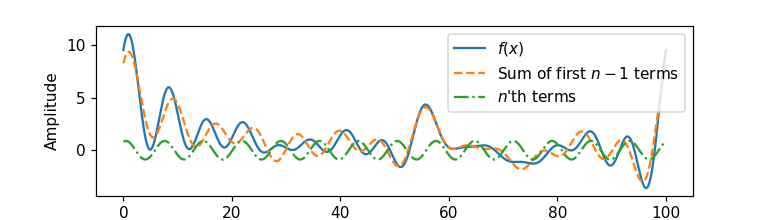

interactive(children=(IntSlider(value=2, continuous_update=False, description='# Terms:', max=15), Output()), …

<function __main__.plot_func(i)>

In [6]:

nT = 1000
T = 100

# Max number of a_n and b_n terms. 
nMax = 15
#a = np.zeros( nMax + 1)
#b = np.zeros( nMax + 1)
a = np.random.rand(nMax + 1)
b = np.random.rand(nMax + 1)
# Setting coefficents 
a[0] = 1
b[0] = 0
#a[1] = 2; a[2]=1; a[3]=-1
#b[1] = 4; b[2]=3; b[3]=2


t = np.linspace(0,T,nT)
C = 2*np.pi/T
f = np.zeros([nT,nMax+1])
g = np.zeros([nT,nMax+1])
f[:,0] = a[0]
g[:,0] = a[0]

for n in range(1,nMax+1): 
    g[:,n] = a[n]*np.cos(n*C*t) + b[n]*np.sin(n*C*t)
    f[:,n] = f[:,n-1] + g[:,n]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(7 , 2)

ax.plot( t , f[:,nMax] , label=r'$f(x)$')
line1, = ax.plot( t , f[:,0] , '--', label=r'Sum of first $n-1$ terms')
line2, = ax.plot( t , g[:,0] , '-.', label=r"$n$'th terms")
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time')
ax.legend()

def plot_func(i):
    global fig
    line1.set_ydata(f[:,max(i-1,0)]) 
    line2.set_ydata(g[:,i]) 
    fig.canvas.draw()
    
interact(plot_func, i = widgets.IntSlider(
    value=2,
    min=0,
    max=nMax,
    step=1,
    description='# Terms:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
        )


# Orthogonality of Trigometric functions and derivate of coefficents 

### To compute the values of the coefficients, $a_n$ and $b_n$, we use the *orthogonality* of trigonometric functions. Specfically, we note the following relationships 


#### $$
\int_0^T \cos\left( \frac{2 n\pi t }{T } \right) \cos\left( \frac{2 m\pi t }{T } \right)  \; dt = \left\{
    \begin{array}{rl}
        \frac{T}{2} & \mbox{if }  n=m,\; n\ne0 \\     
        T    & \mbox{if }  n=m,\;  n=0 \\
        0           & \mbox{if }  n \ne m  
    \end{array}
\right. \quad\quad\quad\quad (3)
$$ 
#### $$
\int_0^T \sin\left( \frac{2 n\pi t }{T } \right) \sin\left( \frac{2 m\pi t }{T } \right)  \; dt = \left\{
    \begin{array}\\
        \frac{T}{2} & \mbox{if }  n=m,\; n\ne0 \\     
        0    & \mbox{if }  n=m,\;  n=0 \\
        0 & \mbox{if }  n \ne m  \\
    \end{array}
\right. \quad \quad\quad\quad (4)
$$ 
#### $$
\int_0^T \cos\left( \frac{2 n\pi t }{T } \right) \sin\left( \frac{2 m\pi t }{T } \right)  \; dt = 0 \quad\quad\quad\quad\quad\quad\quad\quad\quad(5)
$$ 


### Noting the above equations, if we multiple both sides of $(1)$ by  $\cos\left( \frac{2 m\pi t }{T } \right)$, then integrate over he interval $[0,T]$ with respect to $t$,

### &emsp;  $$
\begin{array} \\
    \int_0^T f(t) \cos\left( \frac{2 m\pi t }{T } \right) \; dt & = &  \left[ \int_0^T \sum_{n=-\infty}^\infty a_n \cos\left( \frac{2 n\pi t }{T } \right) + b_n \sin\left( \frac{2 n\pi t }{T } \right) \right] \cos\left( \frac{2 m\pi t }{T } \right)\; dt  \\
    &= &  \sum_{n=-\infty}^\infty \int_0^T \left[ a_n \cos\left( \frac{2 n\pi t }{T } \right) + b_n \sin\left( \frac{2 n\pi t }{T } \right) \right] \cos\left( \frac{2 m\pi t }{T } \right)\; dt \\
    &= &  \sum_{n=-\infty}^\infty \left[ a_n \int_0^T  \cos\left( \frac{2 n\pi t }{T }\right) \cos\left( \frac{2 m\pi t }{T } \right) \; dt  + b_n \int_0^T \sin\left( \frac{2 n\pi t }{T } \right)  \cos\left( \frac{2 m\pi t }{T } \right)\; dt \right] \\
\end{array}
$$

### Substituting equation $(5)$ on the right hand side, all integrals with factors $b_n$ are zero (thus drop out the summation over $n$). Similarlyl, substituting equation $(3)$ all integrals with factors $a_n$  are zero for $m\ne n$. Therefore, there is only one non-zero term in the summation for over $n$ for $n=m$. The above equation thus simplifies to 
### &emsp;  $$
\begin{array}{rcl} \\
    \int_0^T f(t) \cos\left( \frac{2 n\pi t }{T } \right) \; dt & = & a_m \int_0^T  \cos\left( \frac{2 m\pi t }{T } \right) \cos\left( \frac{2 m\pi t }{T } \right)\; dt  \\
    & = & a_m \int_0^T  \cos^2\left( \frac{2 m\pi t }{T } \right) \; dt \\
    & = & a_m \frac{T}{2}\\
    a_m & = & \frac{2}{T} \int_0^T f(t) \cos\left( \frac{2 m\pi t }{T } \right) \; dt
\end{array}
$$

### Similarly, multiplying  equation $(1)$ by $\sin\left( \frac{2 m\pi t }{T } \right)$,  integrating over  the interval $[0,T]$ with respect to $t$, then substituting in equations $(4)$ and $(5)$,
#### &emsp;  $$
    b_m = \frac{2}{T} \int_0^T f(t) \sin\left( \frac{2 m\pi t }{T } \right) \; dt
$$

### or in terms of the orginal subscript $n$,
### $$
\quad \quad
a_n = \frac{2}{T} \int_0^T f(t) \cos\left( \frac{2 n\pi t }{T } \right) \; dt \quad \quad
b_n = \frac{2}{T} \int_0^T f(t) \sin\left( \frac{2 n\pi t }{T } \right) \; dt \quad \textrm{for} \quad n\ne 0 \quad \quad (6)
$$

### For the special case $n=0$, the derivation of $a_0$ is essentially the same 
$$
a_0 = \frac{1}{T} \int_0^T f(t) \; dt
$$
### with $b_0=0$ by definition.

In [6]:
np.shape(f)

(10000, 6)

In [4]:
b

array([0., 4., 3., 2., 0., 0.])